In [1]:
from IPython.display import display, Image
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### Rectified Linear Unit(ReLu)
relu公式为max(x, 0)，当小于0时，其值为0，可微分。但在输入为0时，不可微分。出现输入为0的概率非常低，当出现时，随机赋予其0或1即可，选择relu的理由：
- 计算快，比起sigmoid需要计算exp的，relu只要检查是否大于0，小于0则为0，大于0则直接输出；
- 多个带有不同偏差（即位移的）sigmoid函数的和，叠加后类似于relu，在负值很大时趋于0，正值很大时趋于无穷大；
- 可以处理梯度消失的问题（重点）；

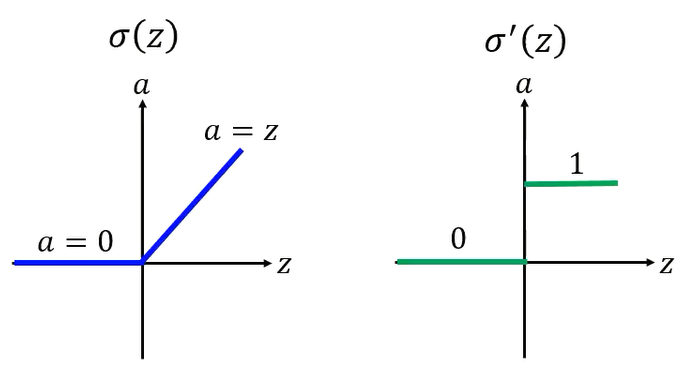

In [2]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/\
master/Tips%20for%20Training%20Deep%20Neural%20Network/tips_for_training01.png')

### Sigmoid存在的问题
下图为sigmoid函数和sigmoid函数的微分图，横坐标为输入，纵坐标为输出。sigmoid函数的微分值最大为0.25，在反向传播中，每通过一层乘以σ′(z)，其值会越来越小，而当σ′(z)变小，整个微分的值δ(l)就会变小

$$ \delta ^{l} = {\sigma }'(z^{l})\cdot (W^{l+1})^{T}\delta ^{l+1} \ \ \ \ \ \ \ \ \ \frac{\partial C_{x}}{\partial w_{ij}^{l}} = \frac{\partial z_{i}^{l}}{\partial w_{ij}^{l}} \frac{\partial C_{x}}{\partial z_{i}^{l}}\rightarrow \delta _{i}^{l}$$

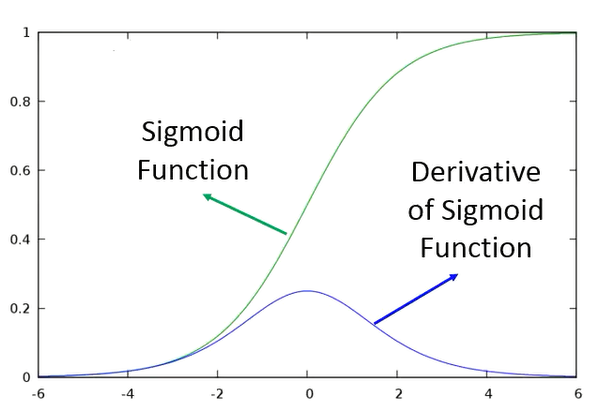

In [3]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/\
master/Tips%20for%20Training%20Deep%20Neural%20Network/tips_for_training02.png')

### 梯度消失问题
这就造成一个问题，越接近输入层的部分，因为乘以多个σ′(z)，其梯度值越小，当学习速率是固定的常数时，导致权重w的改变很小，仍然是随机。而在接近输出层的部分，权重w的改变很大，接近收敛或已经收敛，导致整个网络学习效果很差。换句话说，网络越深，其训练效果越差。

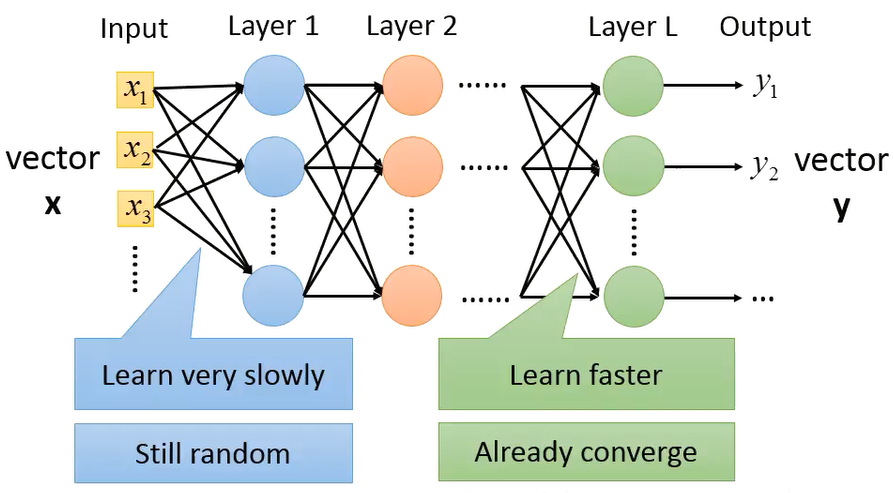

In [5]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Tips%20for%20Training%20Deep%20Neural%20Network/tips_for_training03.png')

而relu则不存在这个问题，因为它的输出不是0就是1，不会传递过程中缩减，出现梯度消失的问题，即输入和输出值都一样，且可将输出为0的神经元当做不存在的，是一个较瘦的神经网络。如下图：

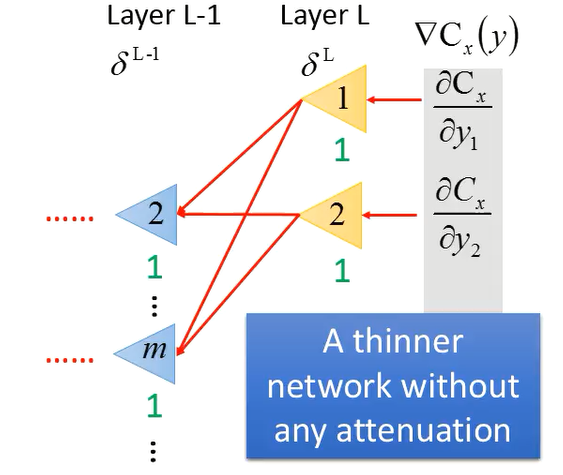

In [6]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Tips%20for%20Training%20Deep%20Neural%20Network/tips_for_training04.png')

### softmax配合损失函数-log(y)

损失函数公式，r表示索引位置，即y(r)越大，假设在数字识别中，有10个分类，其中r=5，true_y为1，则y(5)越大（表明越肯定是这个值），其损失函数-log越小，同时只要让y(5)越大，其它索引的值就会越小：

$$ C = -log y_{r} $$

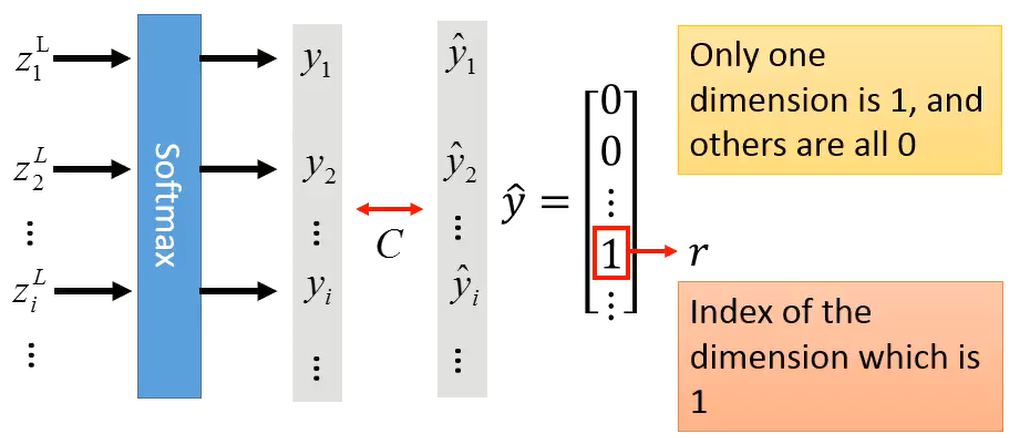

In [12]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/\
master/Tips%20for%20Training%20Deep%20Neural%20Network/tips_for_training05.png')

### Adagrad
对每个参数调整斜率，而不是使用统一的固定斜率，η(t)表示随着epoch的迭代，其t值会越来越大，η(t)会越来小，步长会越来越小。

$$ w^{t+1} \leftarrow w^{t} - \frac{\eta ^{t}}{\sigma  ^{t}}g^{t} \ \ \ \ \ \ \ g^{t} = \frac{\partial C(\theta ^{t})}{\partial w} \ \ \ \ \ \  \eta ^{t} = \frac{\eta }{\sqrt{t+1}}$$

σ是对之前参数w求导后的均方根，举个例子：

$$ w^{1}\leftarrow w^{0} - \frac{\eta ^{0}}{\sigma ^{0}} g^{0} \ \ \ \ \ \ \ \ \ \ \ \ \ \sigma ^{0} = g^{0}  \\
w^{2}\leftarrow w^{1} - \frac{\eta ^{1}}{\sigma ^{1}} g^{1} \ \ \ \ \ \ \ \ \ \sigma ^{1} = \sqrt{\frac{1}{2}\left [ \left (g ^{0} \right )^{2} +  \left (g ^{1} \right )^{2} \right ]}  \\
w^{3}\leftarrow w^{2} - \frac{\eta ^{2}}{\sigma ^{2}} g^{2} \ \ \ \ \ \ \ \ \ \sigma ^{2} = \sqrt{\frac{1}{3}\left [ \left (g ^{0} \right )^{2} +  \left (g ^{1} \right )^{2} + \left (g ^{2} \right )^{2} \right ]} \\
w^{t+1}\leftarrow w^{t} - \frac{\eta ^{t}}{\sigma ^{t}} g^{t} \ \ \ \ \ \ \ \ \ \sigma ^{t} = \sqrt{\frac{1}{t+1} \sum_{i=0}^{t} (g^{i})^{2}}$$


根据上面的公式，η(t)和σ(t)都有相同的1/根号t+1，可以约去，一个固定的常数η除以过去所有算过的梯度的平方和，在开根号。把整项看成学习速率，因为分母项随着时间是逐渐增大的，所有学习速率会越来越小： 

$$ w^{t+1} \leftarrow w^{t} - \frac{\eta }{\sqrt{\sum_{i=0}^{t}(g^{i})^{2}}} g^{t}$$

### Momentum(动量)

梯度下降可以看做一个向下滚的小球，它容易卡在梯度接近0的局部极小值、鞍点，甚至是梯度非常小的一个高原的地方，因设置了最小梯度阈值，所以会停止训练。

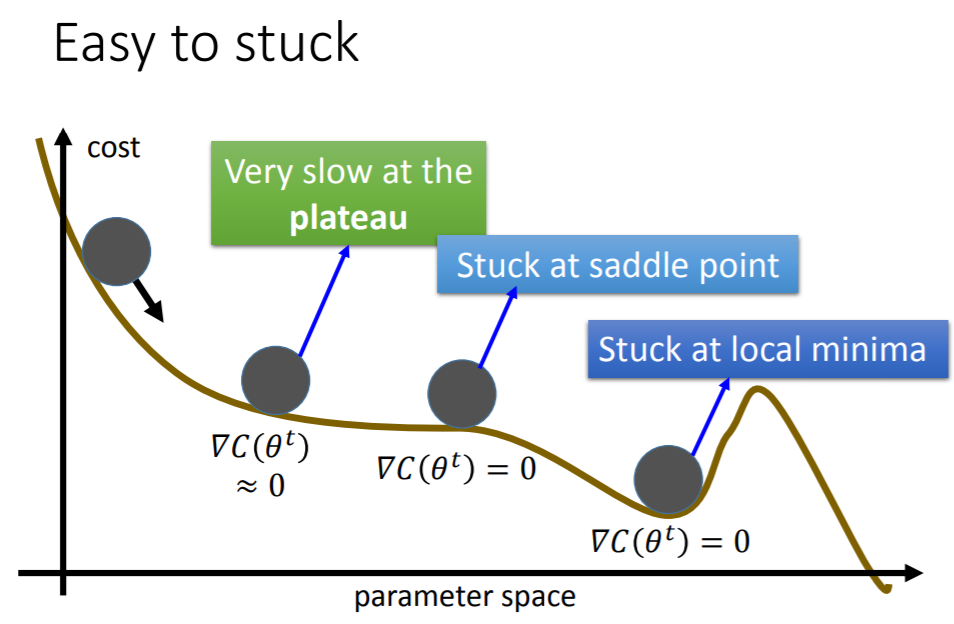

In [2]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Tips%20for%20Training%20Deep%20Neural%20Network/tips_for_training06.png')

Momentum为上一个时间点的梯度下降方向加上当前时间点的梯度下降方向，如果当前时间点的梯度为0或近似为0，停在某处，还可以依靠上一个时间点的梯度继续往下走，而不会停止。如下图：

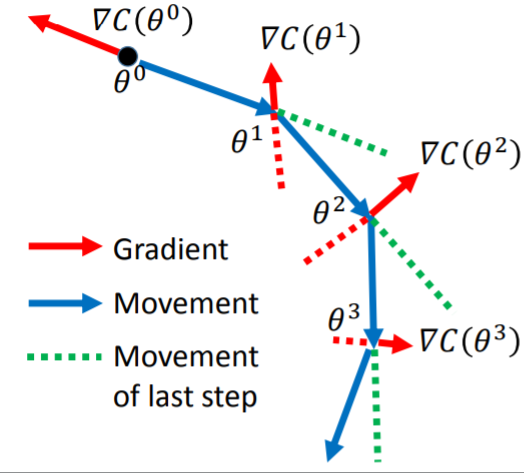

In [3]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Tips%20for%20Training%20Deep%20Neural%20Network/tips_for_training07.png')

从起始点θ(0)开始，初始动量v(0)=0，计算θ(0)的梯度为θ(1)，移动方向为上个时间点移动的方向减去当前时间点的梯度方向，即v(1)=λv(0) + (-η∇C(θ(0)))，因上个时间点方向v(0)=0，所以θ(1)=θ(0)+v(1)=θ(0)-η∇C(θ(0))，正常的梯度下降方向v1。接着计算θ(1)的梯度方向，加上上个时间点的移动方向v(1)，所以真正的移动方向为蓝色实线，即v(2)=λv(1) -η∇C(θ(1))，v(1)为绿色虚线上个时间点的移动方向，∇C(θ(1)为红色虚线当前时间点的梯度下降方向，以此类推。

v(i)实际是所有先前梯度的权重之和，η决定了先前的梯度的影响有多大，越之前的梯度影响越小，η一般会设为接近1的值，如0.9等，即之前的梯度（惯性）影响，使用Momentum可以避开卡在局部极小点或鞍点等。
$$ v^{0}=0 \\
v^{1}=\lambda v^{0} -\eta \nabla C(\Theta ^{0})\\
v^{2}= \lambda v^{1} - \eta \nabla C(\Theta ^{1}) =-\eta \nabla C(\Theta ^{0}) - \eta \nabla C(\Theta ^{1})\\
v^{3}= \lambda v^{2} - \eta \nabla C(\Theta ^{2}) =-\eta \nabla C(\Theta ^{0}) - \eta \nabla C(\Theta ^{1}) - \eta \nabla C(\Theta ^{2}) $$

### 提升模型泛化能力方法

#### 1、创造更多的数据
如在手写数字识别中，将图片向左或向右旋转15度，语音识别中，对声音调快慢和音量高低等；

#### 2、Early Stopping
提早停止，如当连续5个epoch的验证集误差不在减少时，就停止训练；

#### 3、Weight Decay
- 选择接近0的参数。假设训练集为(x, y)，通过一个简单的神经元训练得到z=wx，让z与y值尽量接近。现在有测试集(x', y)，训练集和测试集的分布不是完全一样，假设x'=x+ϵ，把x'代入学习好的模型中，即z'=w(x+ϵ)=z+wϵ。为了让噪声ϵ最小化，要让参数w最小化，尽可能让z'=z，等于我们预先训练好的模型期望值，让训练集和测试集的误差不会过大。
- 寻找一组参数不仅让损失函数最小化，同时也要尽可能接近于0，对参数θ加上L2的正则化项。Θ={w1, w2, ...}，是权重矩阵里每个权重的平方和，如下图。
$$ {C}'(\Theta ) = C(\Theta ) + \lambda \frac{1}{2}\left \| \theta  \right \|^{2} \\
\left \| \Theta  \right \|^{2} = (w_{1}^{11})^{2} + (w_{1}^{12})^{2} + ... + (w_{2}^{11})^{2} + (w_{2}^{12})^{2} +...\\
$$
- 对其做偏微分，因Θ中只有一项跟wi有关，所以偏微分后得到一个w：
$$ \frac{{\partial }'}{\partial w} = \frac{\partial C}{\partial w} + \lambda w \\
$$
- 使用最简单的梯度下降，η为学习速率，λ为惩罚系数，每次更新wt时，因为(1-ηλ)<1，所以wt会越来越小：
$$ w^{t+1}\rightarrow w^{t} - \eta \frac{\partial {C}'}{\partial w} = w^{t} - \eta (\frac{\partial C}{\partial w} + \lambda w^{t}) \\
=(1-\eta \lambda )w^{t} - \eta \frac{\partial C}{\partial w}$$

#### 4、Dropout
- 每次使用SGD抓取部分样本进行训练，在参数更新前，让p%的输入层和隐藏层的神经元从网络中拿去。如p=50%，则输入层和隐藏中的神经元有50%的概率丢弃，然后使用剩下的神经元来进行训练。每次参数更新前都会dropout，这样每次的模型网络都不同，如下图：

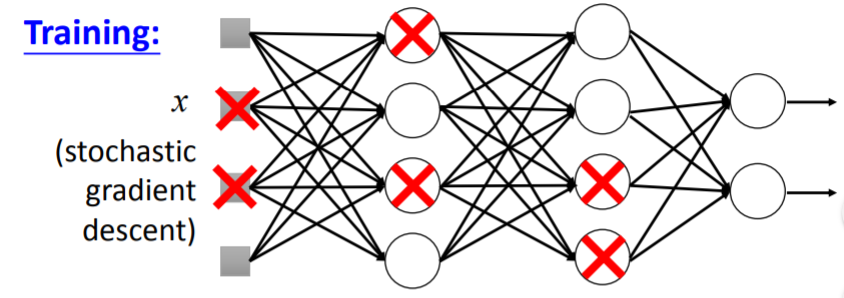

In [4]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Tips%20for%20Training%20Deep%20Neural%20Network/tips_for_training08.png')

- 而在测试中，则不需要使用dropout，且如果训练中dropout为p%，测试中需要将所有权重乘以p%，加入p=50%，测试中的权重矩阵则乘以0.5。这样做的原因是在训练中，是拿50%的输入层数据来训练得出结果z，而在测试中，使用全部数据，则其结果为2z，所以要对权重矩阵乘以50%，使测试中得出的结果为z。如下图所示；

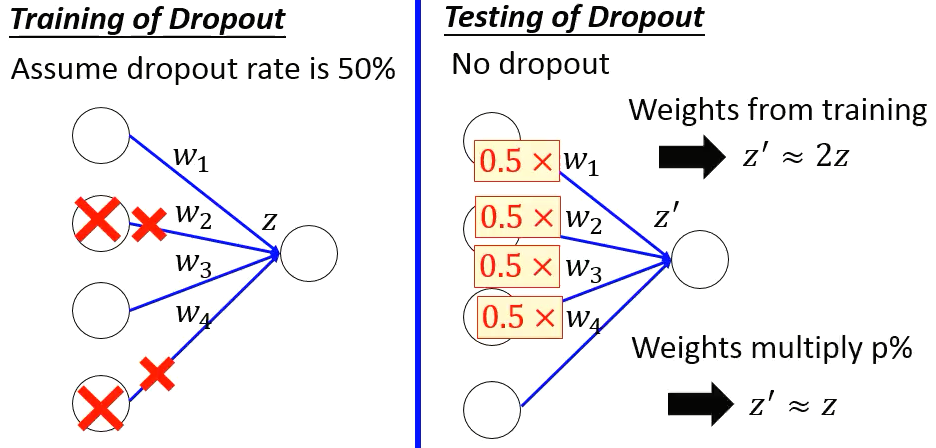

In [8]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Tips%20for%20Training%20Deep%20Neural%20Network/tips_for_training10.png')

- dropout是ensemble的一种。就像随机森林对每棵树使用90%的数据集，训练出不同的树结构。神经网络也类似，使用90%的数据集，训练不同的网络结构。而在测试中，则综合各个模型的结果，求平均预测值。

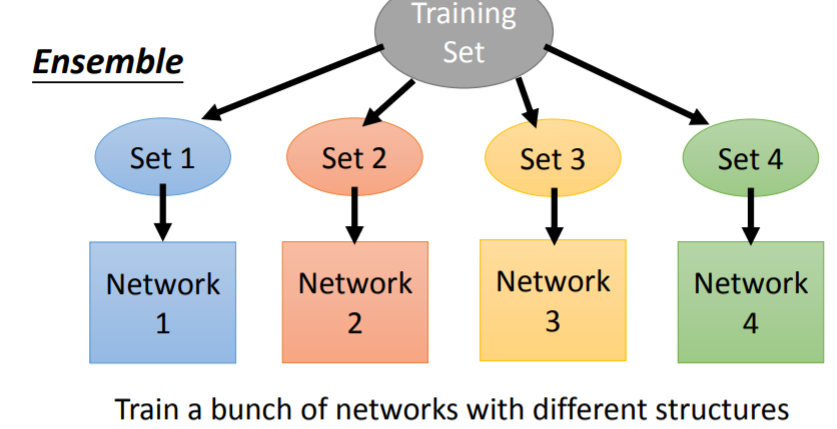

In [9]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Tips%20for%20Training%20Deep%20Neural%20Network/tips_for_training11.png')

Dropout技巧：
- 假设原来网络使用1000个隐藏神经元就可以训练，当使用dropout为50%，新的网络的隐藏神经元则要设置为2000个。dropout后仍有大概1000个神经元用于训练，与原来模型需要使用1000个神经元才能训练好一致。使用dropout后，新的网络模型要比原来不使用dropout的网络模型要大得多；
- 使用dropout后新网络的学习速率要比原来的大，因为一个网络只看一笔数据，所以要尽可能调整权重，让权重不处在初始的随机值；
- 设置较大的Momentum，因为训练不稳定，容易陷入局部极小值、鞍点或高原。